In [2]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [3]:
 #Read the data as a CSV file
data1 = pd.read_csv(Path('project4data.csv'))
data1.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,DIAGNOSIS_REASON,DIAGNOSIS_LEVEL,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID)
0,01016FD1342018BDC00008,FD,1,10/22/2018,10/17/2018,7/9/2018,post adjudication,7/6/2020,prosecutor,6/13/1986,...,substance-induced/related,Primary,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0
1,01016FD1342018BDC00008,FD,1,10/22/2018,10/17/2018,7/9/2018,post adjudication,7/6/2020,prosecutor,6/13/1986,...,substance-induced/related,NaN,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1
2,01016FD1342018BDC00017,FD,1,10/22/2018,8/8/2018,8/13/2018,probation revocation,11/9/2020,defense attorney,12/31/1988,...,substance-induced/related,Primary,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3
3,01016FD1342018BDC00019,FD,1,11/5/2018,6/1/2018,9/5/2018,post adjudication,7/6/2020,defense attorney,5/29/1989,...,substance-induced/related,Primary,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0
4,01016FD1342018BDC00019,FD,1,11/5/2018,6/1/2018,9/5/2018,post adjudication,7/6/2020,defense attorney,5/29/1989,...,substance-induced/related,NaN,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1


In [4]:
#Convert Data objects to Datetime variables 
data1['ACCEPTANCE_DATE'] = pd.to_datetime(data1['ACCEPTANCE_DATE'])

data1['ARREST_DATE'] = pd.to_datetime(data1['ARREST_DATE'])

data1['REFERRAL_DATE'] = pd.to_datetime(data1['REFERRAL_DATE'])
data1['EXIT_DATE'] = pd.to_datetime(data1['EXIT_DATE'])
data1['DOB'] = pd.to_datetime(data1['DOB'])

In [5]:
 #obtain Age from Date of Birth
# import datetime as dt

now = pd.to_datetime('now')

data1['age'] = (now - data1['DOB']).dt.total_seconds() / (60*60*24*365.25)
data1['age'].describe()

count    4396.000000
mean       38.750447
std        11.713486
min         1.517210
25%        30.285861
50%        37.081891
75%        46.187983
max        81.081891
Name: age, dtype: float64

In [6]:
#Calculate difference in days between arrest to acceptance

data1['time_arrest_accept'] = (data1['ACCEPTANCE_DATE'] - data1['ARREST_DATE']).astype('timedelta64[D]').astype('float')

#data1['time_arrest_accept'] = data1['time_arrest_accept'].dt.day

data1['time_arrest_accept'].describe()

count     4327.000000
mean       243.823434
std        416.706577
min      -7670.000000
25%         58.000000
50%        127.000000
75%        307.000000
max      10141.000000
Name: time_arrest_accept, dtype: float64

In [7]:
#Filter data based on reasonable age and differences between arrest dates and program acceptance
person_data = data1[(data1.age > 15) & (data1.time_arrest_accept > 0)]
person_data.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID),age,time_arrest_accept
0,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0,35.450132,5.0
1,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1,35.450132,5.0
2,01016FD1342018BDC00017,FD,1,2018-10-22,2018-08-08,2018-08-13,probation revocation,2020-11-09,defense attorney,1988-12-31,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3,32.898455,75.0
3,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0,32.490516,157.0
4,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1,32.490516,157.0


In [8]:
#Rename Variables
person_data = person_data.rename(columns={"DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)": 'GRADUATED',
                              "CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)": 'PARTICIPANT_ID', 
                              'SUBSTR(P.PROGRAM_ID,6,2)': 'PROGRAM_TYPE',
                              'COUNT(DISTINCTSI.SANC_INCENT_ID)': 'No_SANC_INCENT',
                              'COUNT(DISTINCTT.TREATMENT_ID)': 'No_TREATMENTS',
                              'COUNT(DISTINCTDT.DRUG_TEST_ID)': 'No_DRUG_TEST',
                              'COUNT(DISTINCTEA.EMP_ASSIST_ID)': 'No_EMP_ASSIST',
                              'COUNT(DISTINCTJS_HEARING_ID)': 'No_HEARING',
                              'age': 'AGE',
                              'time_arrest_accept': 'DAYS_TO_ACCEPTANCE'
                              })
person_data.head()

,PARTICIPANT_ID,PROGRAM_TYPE,GRADUATED,ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,No_SANC_INCENT,No_TREATMENTS,No_DRUG_TEST,No_EMP_ASSIST,No_HEARING,AGE,DAYS_TO_ACCEPTANCE
0,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0,35.450132,5.0
1,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1,35.450132,5.0
2,01016FD1342018BDC00017,FD,1,2018-10-22,2018-08-08,2018-08-13,probation revocation,2020-11-09,defense attorney,1988-12-31,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3,32.898455,75.0
3,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0,32.490516,157.0
4,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1,32.490516,157.0


In [45]:
 #Read the data as a CSV file
EMPLOY_ED = pd.read_csv(Path('emp_educ_income_risk.csv'))
EMPLOY_ED.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)",EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY,RISK_LEVEL
0,01034MH147f08b22e5-b058-447b-b358-2b6040d12a4f,some high,unemployed,No income,Ware,NaN
1,06038VC1169288402d-c5ad-4eb8-ae24-48ee2f0c6a8a,some college,full-time,"$25,000-$34,999",Carroll,low
2,10107FT1027dded030-86bf-49e7-91eb-7a8a2af8a111,high school/GED,full-time,"$15,000-$19,999",Newton,low
3,04044FD142f288ab8d-5d6e-4bb8-a365-5f527adb6e84,some college,disability,"$10,000-$14,999",DeKalb,NaN
4,02037FD101727fe12d-2089-4041-87ed-918e818d0c13,middle,unemployed,No income,Berrien,NaN


In [46]:
#load in employment and education data
EMPLOY_ED = EMPLOY_ED.rename(columns={"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)":'PARTICIPANT_ID'})
EMPLOY_ED.head()

,PARTICIPANT_ID,EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY,RISK_LEVEL
0,01034MH147f08b22e5-b058-447b-b358-2b6040d12a4f,some high,unemployed,No income,Ware,NaN
1,06038VC1169288402d-c5ad-4eb8-ae24-48ee2f0c6a8a,some college,full-time,"$25,000-$34,999",Carroll,low
2,10107FT1027dded030-86bf-49e7-91eb-7a8a2af8a111,high school/GED,full-time,"$15,000-$19,999",Newton,low
3,04044FD142f288ab8d-5d6e-4bb8-a365-5f527adb6e84,some college,disability,"$10,000-$14,999",DeKalb,NaN
4,02037FD101727fe12d-2089-4041-87ed-918e818d0c13,middle,unemployed,No income,Berrien,NaN


In [47]:
#join the employment with the court and treatment data
joined = person_data.merge(EMPLOY_ED, on='PARTICIPANT_ID', how='inner')
joined['PRIMARY_DRUG_CHOICE'].value_counts()
#joined.to_csv('joined_df.csv', index=False)

amphetamines/Meth(amphetamines)    1231
alcohol                            1126
marijuana/cannabinoids              667
crack/cocaine                       332
heroin                              245
prescription narcotics              205
none                                150
benzodiazepines                      32
other                                23
ecstasy/MDMA                         19
prescription opioids                 18
other prescriptions                  18
Synthetic Cannabinoids               10
hallucinogens                         2
Name: PRIMARY_DRUG_CHOICE, dtype: int64

In [48]:
#Recode Race
RACE2=['white', 'black/African American', 'Hispanic/Latino','two or more/mixed', 'Asian', 'American Indian', 'other', 'middle eastern or north African', 'Pacific Islander or native Hawaiian']
R_CAT=['White', 'Black', 'Hispanic', 'Other', 'Other','Other','Other','Other','Other']

joined['RACE_CAT'] = joined['RACE'].replace(RACE2, R_CAT)
joined['RACE_CAT'].value_counts()

White       2631
Black       1232
Hispanic     146
Other         76
Name: RACE_CAT, dtype: int64

In [49]:
#Recode Primary Drug
P_Drug =['amphetamines/Meth(amphetamines)',
'alcohol'     ,
'marijuana/cannabinoids'  ,
'crack/cocaine'   ,
'heroin'   ,
'prescription narcotics' ,
'none' ,
'benzodiazepines',
'other'  ,
'prescription opioids',
'ecstasy/MDMA',
'other prescriptions',
'Synthetic Cannabinoids',
'hallucinogens']
D_Cat = ['amphetamines/Meth(amphetamines)',
'alcohol',
'marijuana/cannabinoids',
'crack/cocaine',
'heroin',
'prescription drugs',
'none',
'prescription drugs',
'Other'  ,
'prescription drugs',
'Other',
'prescription drugs',
'Other',
'Other']
joined['P_DRUG_CAT'] = joined['PRIMARY_DRUG_CHOICE'].replace(P_Drug, D_Cat)
joined['P_DRUG_CAT'].value_counts()

amphetamines/Meth(amphetamines)    1231
alcohol                            1126
marijuana/cannabinoids              667
crack/cocaine                       332
prescription drugs                  273
heroin                              245
none                                150
Other                                54
Name: P_DRUG_CAT, dtype: int64

In [50]:
#Recode Secondary Drug
S_Drug =['none','marijuana/cannabinoids','alcohol','amphetamines/Meth(amphetamines)',
'crack/cocaine','prescription narcotics','other','heroin', 'benzodiazepines',
'prescription opioids','other prescriptions',
'ecstasy/MDMA','Synthetic Cannabinoids', 'inhalants',
'hallucinogens']
D2_Cat = ['none','marijuana/cannabinoids','alcohol','amphetamines/Meth(amphetamines)',
'crack/cocaine','prescription drugs', 'Other', 'heroin','prescription drugs','prescription drugs',
'prescription drugs','Other','Other','Other','Other']
joined['S_DRUG_CAT'] = joined['SECONDARY_DRUG_CHOICE'].replace(S_Drug, D2_Cat)
joined['S_DRUG_CAT'].value_counts()

none                               1404
marijuana/cannabinoids              917
alcohol                             500
amphetamines/Meth(amphetamines)     434
prescription drugs                  369
crack/cocaine                       244
Other                               124
heroin                               86
Name: S_DRUG_CAT, dtype: int64

In [51]:
joined['EDUCATION_LEVEL'].value_counts()

high school/GED                    1993
some high                          1034
some college                        524
middle                              145
bachelors degree                    143
associates degree                   129
professional or graduate degree      76
elementary                           27
Name: EDUCATION_LEVEL, dtype: int64

In [52]:
#Recode Education
sch = ['high school/GED','some high','some college','bachelors degree','middle',
'associates degree','professional or graduate degree','elementary']
sch_cat = ['HS or less', 'HS or less', 'some college','college grad or more','HS or less',
          'some college', 'college grad or more', 'HS or less']
joined['EDUC_CAT'] = joined['EDUCATION_LEVEL'].replace(sch, sch_cat)
joined['EDUC_CAT'].value_counts()

HS or less              3199
some college             653
college grad or more     219
Name: EDUC_CAT, dtype: int64

In [43]:
# joined.isnull().sum()
# joined.to_csv('final_df.csv', index=False)

In [44]:
joined['EMP_STATUS'].value_counts()


unemployed                      1763
full-time                       1364
part-time more than 20 hours     390
disability                       211
part-time less than 20 hours     143
student/training                  66
vocational rehab                  15
Name: EMP_STATUS, dtype: int64

In [54]:
#Recode Employment
job = ['unemployed','full-time','part-time more than 20 hours','disability',
'part-time less than 20 hours','student/training','vocational rehab']
job_cat = ['unemployed', 'full-time', 'part-time','disability','part-time',
          'part-time', 'disability']
joined['EMPLOY_CAT'] = joined['EMP_STATUS'].replace(job, job_cat)
joined['EMPLOY_CAT'].value_counts()

unemployed    1817
full-time     1408
part-time      621
disability     239
Name: EMPLOY_CAT, dtype: int64

In [55]:
#Save joined file to CSV
joined.to_csv('final_df.csv', index=False)

In [12]:
#drop irrelevant variables
joined2 = joined.drop(['PARTICIPANT_ID', 'ACCEPTANCE_DATE','ARREST_DATE', 'EXIT_DATE', 'REFERRAL_DATE', 'DOB', 'SECONDARY_DRUG_CHOICE',
                     'PRIMARY_DRUG_CHOICE', 'RACE', 'EDUCATION_LEVEL','REFERRAL_SOURCE', 'EMP_STATUS'], axis=1)
joined2.head()

,PROGRAM_TYPE,GRADUATED,ACCEPTANCE_TYPE,REFERRAL_SOURCE,GENDER,RACE,EMP_UNSTABLE_CHRONIC,DIAGNOSIS_REASON,DIAGNOSIS_LEVEL,EMP_ASSIST_TYPE,...,No_TREATMENTS,No_DRUG_TEST,No_EMP_ASSIST,No_HEARING,AGE,DAYS_TO_ACCEPTANCE,EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY
0,FD,1,post adjudication,prosecutor,male,white,yes,substance-induced/related,Primary,NaN,...,1,1,0,0,35.447472,5.0,some high,full-time,No income,Bulloch
1,FD,1,post adjudication,prosecutor,male,white,yes,substance-induced/related,NaN,NaN,...,0,21,0,1,35.447472,5.0,some high,full-time,No income,Bulloch
2,FD,1,probation revocation,defense attorney,female,black/African American,yes,substance-induced/related,Primary,NaN,...,1,5,0,3,32.895795,75.0,some high,unemployed,No income,Bulloch
3,FD,1,post adjudication,defense attorney,male,white,no,substance-induced/related,Primary,NaN,...,1,0,0,0,32.487855,157.0,some high,full-time,No income,Screven
4,FD,1,post adjudication,defense attorney,male,white,no,substance-induced/related,NaN,NaN,...,0,6,0,1,32.487855,157.0,some high,full-time,No income,Screven


In [13]:
#create features

X = pd.get_dummies(joined2, columns= ['PROGRAM_TYPE', 'ACCEPTANCE_TYPE', 'GENDER','RACE_CAT','EMP_UNSTABLE_CHRONIC',
'DIAGNOSIS_REASON','DIAGNOSIS_LEVEL','EMP_ASSIST_TYPE','PRIMARY_DRUG_CHOICE',
'SECONDARY_DRUG_CHOICE', 'EDUCATION_LEVEL', 'EMP_STATUS', 
'INCOME_LEVEL', 'RESIDENCE_COUNTY']).drop('GRADUATED',axis=1)

y = joined2['GRADUATED']

In [14]:
#shape of the independent variables
print(X.shape)
#shape of the outcome variable
print(y.shape)

(3952, 246)
(3952,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, stratify=y)


In [16]:
#scaling the data by using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RandomForestClassifier
from itertools import combinations
from sklearn.base import clone
from sklearn.metrics import accuracy_score
 
class SequentialForwardSelection():
     
    '''
    Instantiate with Estimator and given number of features
    '''
    def __init__(self, estimator, k_features):
        self.estimator = clone(estimator)
        self.k_features = k_features
         
    '''
    X_train - Training data Pandas dataframe
    X_test - Test data Pandas dataframe
    y_train - Training label Pandas dataframe
    y_test - Test data Pandas dataframe
    '''  
    def fit(self, X_train, X_test, y_train, y_test):
        max_indices = tuple(range(X_train.shape[1]))
        total_features_count = len(max_indices)
        self.subsets_ = []
        self.scores_ = []
        self.indices_ = []
        '''
        Iterate through the feature space to find the first feature
        which gives the maximum model performance
        '''
        scores = []
        subsets = []
        for p in combinations(max_indices, r=1):
                score = self._calc_score(X_train.values, X_test.values, y_train.values, y_test.values, p)
                scores.append(score)
                subsets.append(p)
        #
        # Find the single feature having best score
        #
        best_score_index = np.argmax(scores)
        self.scores_.append(scores[best_score_index])
        self.indices_ = list(subsets[best_score_index])
        self.subsets_.append(self.indices_)
         
        #
        # Add a feature one by one until k_features is reached
        #
        dim = 1
        while dim < self.k_features:
            scores = []
            subsets = []
            current_feature = dim
            '''
            Add the remaining features one-by-one from the remaining feature set
            Calculate the score for every feature combinations
            '''
            idx = 0
            while idx < total_features_count:
                if idx not in self.indices_:
                    indices = list(self.indices_)
                    indices.append(idx)
                    score = self._calc_score(X_train.values, X_test.values, y_train.values, y_test.values,indices)
                    scores.append(score)
                    subsets.append(indices)
                idx += 1
             
            #
            # Get the index of best score
            #
            best_score_index = np.argmax(scores)
            #
            # Record the best score
            #
            self.scores_.append(scores[best_score_index])
            #
            # Get the indices of features which gave best score
            #
            self.indices_ = list(subsets[best_score_index])
            #
            # Record the indices of features for best score
            #
            self.subsets_.append(self.indices_)
             
            dim += 1
             
        self.k_score_ = self.scores_[-1]
     
    '''
    Transform training, test data set to the data set
    havng features which gave best score
    '''
    def transform(self, X):
        return X.values[:, self.indices_]
     
    '''
    Train models with specific set of features
    indices - indices of features
    '''
    def _calc_score(self, X_train, X_test, y_train, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train.ravel())
        y_pred = self.estimator.predict(X_test[:, indices])
        score = accuracy_score(y_test, y_pred)
        return score

In [ ]:
#
# Instantiate the estimator - LogisticRegression
#
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
feature_names = X.columns
# Number of features
#
k_features = 20
#
# Instantiate SequentialBackwardSearch
#
sfs = SequentialForwardSelection(rf_model, k_features)
#
# Fit the data to determine the k_features which give the
# most optimal model performance
#
sfs.fit(X_train, X_test, y_train, y_test)
#
# Transform the training data set to dataset having k_features
# giving most optimal model performance
#
X_train_sfs = sfs.transform(X_train)
#
# Transform the test data set to dataset having k_features
#
X_test_sfs = sfs.transform(X_test)

In [ ]:
print(
    "Features selected by forward sequential selection: "
    f"{X_train[sfs.get_support()].tolist()}"
)

In [ ]:
k_features = [len(k) for k in sfs.subsets_]
plt.plot(k_features, sfs.scores_, marker='o')
plt.ylim([0.5, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [17]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [18]:
#Examine number of features ranging from 5 to 20
def get_models():
    models = dict()
    for i in range(5, 20):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

In [19]:
#Here we will use cross-validation to evaluate the model
def evaluate_model(model, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=22)
    scores = cross_val_score(model, X_train, y_train, 
                             scoring='accuracy', 
                             cv=cv, 
                             n_jobs=1,
                            error_score='raise')
    return scores    

>5 0.660 (0.009)
>6 0.664 (0.013)
>7 0.677 (0.012)
>8 0.680 (0.014)
>9 0.683 (0.016)
>10 0.691 (0.019)
>11 0.693 (0.014)
>12 0.688 (0.019)
>13 0.693 (0.019)
>14 0.694 (0.013)
>15 0.695 (0.012)
>16 0.699 (0.013)
>17 0.692 (0.017)
>18 0.695 (0.015)
>19 0.695 (0.019)


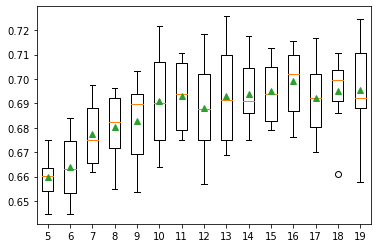

In [21]:
#define the data
models= get_models()
#evaluate the models and store results
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.876 (0.042)
>per 0.877 (0.041)
>cart 0.877 (0.045)
>rf 0.880 (0.039)
>gbm 0.878 (0.042)


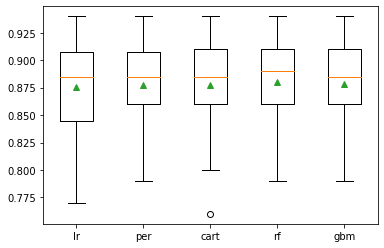

In [26]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# lr
	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=11)
	model = DecisionTreeClassifier()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
	# perceptron
	rfe = RFE(estimator=Perceptron(), n_features_to_select=11)
	model = DecisionTreeClassifier()
	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
	# cart
	rfe = RFE(estimator=AdaBoostClassifier(), n_features_to_select=11)
	model = DecisionTreeClassifier()
	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
	# rf
	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=11)
	model = DecisionTreeClassifier()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gbm
	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=11)
	model = DecisionTreeClassifier()
	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=22)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [33]:
# define RFE
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=11)
model=RandomForestClassifier()
# fit RFE
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X_train, y_train)
# summarize all features
for i in range(X_train.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 190.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 6.000
Column: 9, Selected False, Rank: 47.000
Column: 10, Selected False, Rank: 67.000
Column: 11, Selected False, Rank: 115.000
Column: 12, Selected False, Rank: 23.000
Column: 13, Selected False, Rank: 170.000
Column: 14, Selected False, Rank: 53.000
Column: 15, Selected False, Rank: 56.000
Column: 16, Selected False, Rank: 4.000
Column: 17, Selected False, Rank: 18.000
Column: 18, Selected False, Rank: 28.000
Column: 19, Selected False, Rank: 26.000
Column: 20, Selected False, Rank: 7.000
Column: 21, Selected False, Rank: 104.000
Column: 22, Selected False, Rank: 69.000
Column: 23, Selected False, Rank: 89.000
Column: 24, Selected False, Rank: 116.0

In [44]:
#create a seperate dataframe with the selected variables
selected = joined2[['No_SANC_INCENT','No_TREATMENTS', 'No_DRUG_TEST', 'No_HEARING', 'AGE', 
                  'DAYS_TO_ACCEPTANCE', 'REFERRAL_SOURCE', 'RACE', 'PRIMARY_DRUG_CHOICE', 'SECONDARY_DRUG_CHOICE',
                'EMP_STATUS','GRADUATED']]
selected.head()




,No_SANC_INCENT,No_TREATMENTS,No_DRUG_TEST,No_HEARING,AGE,DAYS_TO_ACCEPTANCE,REFERRAL_SOURCE,RACE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,EMP_STATUS,GRADUATED
0,1,1,1,0,35.447472,5.0,prosecutor,white,amphetamines/Meth(amphetamines),crack/cocaine,full-time,1
1,0,0,21,1,35.447472,5.0,prosecutor,white,amphetamines/Meth(amphetamines),crack/cocaine,full-time,1
2,1,1,5,3,32.895795,75.0,defense attorney,black/African American,marijuana/cannabinoids,amphetamines/Meth(amphetamines),unemployed,1
3,1,1,0,0,32.487855,157.0,defense attorney,white,marijuana/cannabinoids,amphetamines/Meth(amphetamines),full-time,1
4,0,0,6,1,32.487855,157.0,defense attorney,white,marijuana/cannabinoids,amphetamines/Meth(amphetamines),full-time,1


In [47]:
#create features

X = pd.get_dummies(selected, columns= ['REFERRAL_SOURCE', 'RACE', 'PRIMARY_DRUG_CHOICE', 'SECONDARY_DRUG_CHOICE',
                'EMP_STATUS']).drop('GRADUATED',axis=1)

y = selected['GRADUATED']

X.head()

,No_SANC_INCENT,No_TREATMENTS,No_DRUG_TEST,No_HEARING,AGE,DAYS_TO_ACCEPTANCE,REFERRAL_SOURCE_court,REFERRAL_SOURCE_defense attorney,REFERRAL_SOURCE_family,REFERRAL_SOURCE_family services,REFERRAL_SOURCE_juvenile services,REFERRAL_SOURCE_law enforcement,REFERRAL_SOURCE_other,REFERRAL_SOURCE_parole,REFERRAL_SOURCE_probation,REFERRAL_SOURCE_prosecutor,REFERRAL_SOURCE_self,REFERRAL_SOURCE_sheriff,REFERRAL_SOURCE_treatment provider,RACE_American Indian,RACE_Asian,RACE_Hispanic/Latino,RACE_Pacific Islander or native Hawaiian,RACE_black/African American,RACE_middle eastern or north African,RACE_other,RACE_two or more/mixed,RACE_white,PRIMARY_DRUG_CHOICE_Synthetic Cannabinoids,PRIMARY_DRUG_CHOICE_alcohol,PRIMARY_DRUG_CHOICE_amphetamines/Meth(amphetamines),PRIMARY_DRUG_CHOICE_benzodiazepines,PRIMARY_DRUG_CHOICE_crack/cocaine,PRIMARY_DRUG_CHOICE_ecstasy/MDMA,PRIMARY_DRUG_CHOICE_hallucinogens,PRIMARY_DRUG_CHOICE_heroin,PRIMARY_DRUG_CHOICE_marijuana/cannabinoids,PRIMARY_DRUG_CHOICE_none,PRIMARY_DRUG_CHOICE_other,PRIMARY_DRUG_CHOICE_other prescriptions,PRIMARY_DRUG_CHOICE_prescription narcotics,PRIMARY_DRUG_CHOICE_prescription opioids,SECONDARY_DRUG_CHOICE_Synthetic Cannabinoids,SECONDARY_DRUG_CHOICE_alcohol,SECONDARY_DRUG_CHOICE_amphetamines/Meth(amphetamines),SECONDARY_DRUG_CHOICE_benzodiazepines,SECONDARY_DRUG_CHOICE_crack/cocaine,SECONDARY_DRUG_CHOICE_ecstasy/MDMA,SECONDARY_DRUG_CHOICE_hallucinogens,SECONDARY_DRUG_CHOICE_heroin,SECONDARY_DRUG_CHOICE_inhalants,SECONDARY_DRUG_CHOICE_marijuana/cannabinoids,SECONDARY_DRUG_CHOICE_none,SECONDARY_DRUG_CHOICE_other,SECONDARY_DRUG_CHOICE_other prescriptions,SECONDARY_DRUG_CHOICE_prescription narcotics,SECONDARY_DRUG_CHOICE_prescription opioids,EMP_STATUS_disability,EMP_STATUS_full-time,EMP_STATUS_part-time less than 20 hours,EMP_STATUS_part-time more than 20 hours,EMP_STATUS_student/training,EMP_STATUS_unemployed,EMP_STATUS_vocational rehab
0,1,1,1,0,35.447472,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,21,1,35.447472,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1,5,3,32.895795,75.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,32.487855,157.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,6,1,32.487855,157.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, stratify=y)

In [49]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pickle
#fit the model to the training set
rf_model = RandomForestClassifier(random_state=42)
#Train our model using the training data: output training and testing scores



from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))

# y_pred = rf_model.predict(X_test_scaled)
# print(f'*****************RANDOM FOREST MODEL*******************')
# print(classification_report_imbalanced(y_test, y_pred))
# # rf_model.score(X_train_scaled, y_train)
# # rf_model.score(X_test_scaled, y_test)
# print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {rf_model.score(X_test_scaled, y_test)}')

In [51]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'n_estimators': 755,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [53]:
from imblearn.metrics import classification_report_imbalanced
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pickle
#fit the model to the training set
rf_model = RandomForestClassifier(random_state=42,n_estimators=755,
              min_samples_split=2,
              min_samples_leaf=1,
              max_features='sqrt',
              max_depth=10,
              bootstrap=False )

rf_model.fit(X_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

#Print Classification Report and Accuracy
y_pred = rf_model.predict(X_test)
print(f'*****************RANDOM FOREST MODEL*******************')
print(classification_report_imbalanced(y_test, y_pred))
# rf_model.score(X_train_scaled, y_train)
# rf_model.score(X_test_scaled, y_test)
print(f'Training Score: {rf_model.score(X_train, y_train)}')
print(f'Testing Score: {rf_model.score(X_test, y_test)}')

*****************RANDOM FOREST MODEL*******************
                   pre       rec       spe        f1       geo       iba       sup

          0       0.76      0.51      0.90      0.61      0.68      0.44       379
          1       0.75      0.90      0.51      0.82      0.68      0.48       609

avg / total       0.75      0.75      0.66      0.74      0.68      0.47       988

Training Score: 0.9035087719298246
Testing Score: 0.7520242914979757
